In [1]:
#import library
import csv
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

Using TensorFlow backend.


In [2]:
#load dataset file
filename = 'pulsar_stars.csv'
raw_data = open(filename, 'rt')

#csv load file
#reader = csv.reader(raw_data, delimiter = ',', quoting = csv.QUOTE_NONE)
#x = list(reader)
#sheet = np.array(x)
#X = np.array(sheet[1:sheet.shape[0],0:(sheet.shape[1]-1)]).astype('float32')
#Y = np.array(sheet[1:sheet.shape[0],(sheet.shape[1]-1):sheet.shape[1]]).astype('float32')

#numpy load file, autoconvert to float64, skiprows = 1 to skip first row
sheet = np.loadtxt(raw_data, delimiter = ",", skiprows = 1)
X = np.array(sheet[:,0:(sheet.shape[1]-1)])
Y = np.array(sheet[:,(sheet.shape[1]-1):sheet.shape[1]])

print("CSV file shape:", sheet.shape, 'CSV array type:', sheet.dtype)
print("Features shape:", X.shape, 'Features type:', X.dtype)
print("Label shape:", Y.shape, 'Label type:', Y.dtype)
n=300
m=304
for i in range (n, m):
    print('X',i,':',X[i], 'Y',i,':',Y[i])

CSV file shape: (17898, 9) CSV array type: float64
Features shape: (17898, 8) Features type: float64
Label shape: (17898, 1) Label type: float64
X 300 : [ 1.35078125e+02  4.86865949e+01  1.13357619e-01 -1.47732293e-01
  2.35451505e+00  1.72437203e+01  9.29144873e+00  1.00291910e+02] Y 300 : [0.]
X 301 : [ 1.25679688e+02  4.80378974e+01  1.48706700e-02 -4.38671480e-02
  5.91471572e+00  2.72983532e+01  5.19041361e+00  2.93343893e+01] Y 301 : [0.]
X 302 : [ 1.19195312e+02  5.19281443e+01  4.71409480e-02 -6.86541211e-01
  9.62792642e+00  3.88931457e+01  4.07205258e+00  1.55989075e+01] Y 302 : [0.]
X 303 : [105.5         41.84177787   0.41714868   0.860093     2.08277592
  19.14167399  10.14673318 107.6216551 ] Y 303 : [1.]


In [3]:
#normalize X
X = normalize(X, axis=-1, order=2)
#split train/test sets
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)

In [4]:
#creat model
model = keras.Sequential([keras.layers.Dense(28, activation = tf.nn.relu, input_dim = 8),
                          keras.layers.Dense(1, activation = tf.nn.sigmoid),
                         ])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
#compile the model
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [6]:
#run model
N = 30
H = model.fit(xTrain, yTrain, epochs = N, validation_data=(xTest, yTest))

Train on 14318 samples, validate on 3580 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
14318/14318 [==============================] - 1s 63us/sample - loss: 0.3306 - acc: 0.8645 - val_loss: 0.1503 - val_acc: 0.9595
Epoch 2/30
14318/14318 [==============================] - 1s 43us/sample - loss: 0.1456 - acc: 0.9552 - val_loss: 0.1144 - val_acc: 0.9668
Epoch 3/30
14318/14318 [==============================] - 1s 41us/sample - loss: 0.1237 - acc: 0.9628 - val_loss: 0.1017 - val_acc: 0.9709
Epoch 4/30
14318/14318 [==============================] - 1s 45us/sample - loss: 0.1116 - acc: 0.9661 - val_loss: 0.0924 - val_acc: 0.9763
Epoch 5/30
14318/14318 [==============================] - 1s 45us/sample - loss: 0.1038 - acc: 0.9690 - val_loss: 0.0860 - val_acc: 0.9754
Epoch 6/30
14318/14318 [==============================] - 1s 55us/sample - loss: 0.0992 - acc: 0.9702 - val_loss: 0.0886 - val_acc: 0.9782
Epoch 7/30
14318/14318 [==============================] - 1s 46us/sam

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                252       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 29        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
14318/14318 [==============================] - 0s 20us/sample - loss: 0.0870 - acc: 0.9738
Train accuracy: 0.9738092
3580/3580 [==============================] - 0s 21us/sample - loss: 0.0728 - acc: 0.9824
Test accuracy: 0.9824022


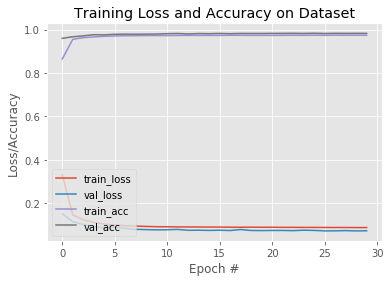

In [7]:
#evaluate accuracy
model.summary()
train_loss, train_acc = model.evaluate(xTrain, yTrain)
print('Train accuracy:', train_acc)
test_loss, test_acc = model.evaluate(xTest, yTest)
print('Test accuracy:', test_acc)

#plot
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")



In [8]:
prediction = model.predict(xTest)
prediction[prediction <0.5] = 0
prediction[prediction >= 0.5] = 1
report = classification_report(yTest, prediction, target_names=['Non-pulsar Star', 'Pulsar Star'])
#scores = model.evaluate(testX, testY, verbose = 0)
#print('Accuracy = {:.7f}'.format(scores[1]))
print(report)

                 precision    recall  f1-score   support

Non-pulsar Star       0.99      0.99      0.99      3306
    Pulsar Star       0.93      0.84      0.88       274

      micro avg       0.98      0.98      0.98      3580
      macro avg       0.96      0.92      0.93      3580
   weighted avg       0.98      0.98      0.98      3580



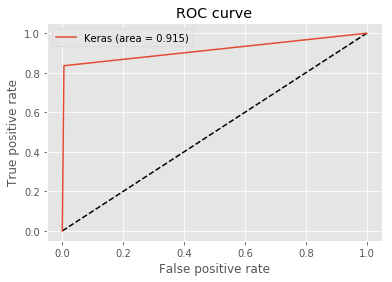

In [9]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(yTest, prediction)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()